In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import scipy as sp
import IPython
import sys
import sklearn
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,13)

In [2]:
#loading the datasets
train = pd.read_csv("train_HE_EA.csv")
test = pd.read_csv("test_HE_EA.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Employee attrition is defined as the unpredictable and uncontrollable, but normal, reduction of the workforce due to resignations, retirement, sickness, or death. The employee attrition rate measures the number of people who move out of a company and are not replaced.

In [4]:
#view on train dataset
train.head(50)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,50,1,1,6.0,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,49,0,1,9.0,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,34,0,2,5.0,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [5]:
#shape of trainset
train.shape

(7000, 24)

In [6]:
#view on test dataset
test.head(20)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
5,EID_20283,F,22.0,4,Married,Franklin,IT,Behavioral,3.0,1,53,0,3,6.0,type2,1.0,3,NaN,-0.4537,2.0,3,8,3
6,EID_21014,M,42.0,3,Married,Washington,Purchasing,Analytical,6.0,4,35,1,3,4.0,type2,1.0,3,0.7516,1.8688,2.0,3,7,3
7,EID_7693,F,41.0,2,Married,Springfield,Sales,Conceptual,4.0,4,35,1,4,8.0,type2,1.0,3,-0.1048,1.8688,2.0,2,7,5
8,EID_13232,M,31.0,1,Single,Springfield,IT,Analytical,7.0,3,73,2,3,8.0,type2,3.0,3,1.6081,0.7075,2.0,2,7,4
9,EID_6515,M,48.0,2,Single,Springfield,R&D,Conceptual,16.0,1,32,1,2,4.0,type0,3.0,3,-0.1048,-0.4537,2.0,4,7,4


In [7]:
#shape of testset
test.shape

(3000, 23)

In [8]:
sample = pd.DataFrame(columns=['Employee_ID','Attrition_rate'])

In [9]:
#view on sample dataset
sample['Employee_ID'] = test['Employee_ID']

In [10]:
sample['Attrition_rate'] = sample['Attrition_rate'].fillna(0)

In [11]:
sample.shape

(3000, 2)

In [12]:
sample.head()

,Employee_ID,Attrition_rate
0,EID_22713,0
1,EID_9658,0
2,EID_22203,0
3,EID_7652,0
4,EID_6516,0


In [13]:
#information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [14]:
#describing the trainset
train.describe(include = 'all')

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000,7000,6588.000000,7000.000000,7000,7000,7000,7000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,7000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
unique,7000,2,NaN,NaN,2,5,12,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EID_14145,F,NaN,NaN,Married,Lebanon,IT,Conceptual,NaN,NaN,NaN,NaN,NaN,NaN,type2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4114,NaN,NaN,4520,2070,1394,1756,NaN,NaN,NaN,NaN,NaN,NaN,3945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,39.622799,3.187857,NaN,NaN,NaN,NaN,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,NaN,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,NaN,NaN,13.606920,1.065102,NaN,NaN,NaN,NaN,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,NaN,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,NaN,NaN,19.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,NaN,NaN,27.000000,3.000000,NaN,NaN,NaN,NaN,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,NaN,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,NaN,NaN,37.000000,3.000000,NaN,NaN,NaN,NaN,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,NaN,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,NaN,NaN,52.000000,4.000000,NaN,NaN,NaN,NaN,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,NaN,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000


In [15]:
#combining the train and test datasets in a dataframe
df = pd.concat([train,test])
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [16]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,1.000000,0.002175,0.015967,-0.013758,-0.008504,-0.005460,0.008037,0.014472,0.007703,-0.009131,0.002498,-0.012614,-0.003729,0.012371,-0.002888,-0.001633,-0.006327,-0.009134,0.006565,0.004003,0.002200,0.003151,-0.001367,-0.282605
Gender,0.002175,1.000000,0.013217,-0.005122,-0.002341,-0.016613,-0.019350,0.013004,-0.001885,0.019120,0.028588,0.020526,0.009074,-0.007521,0.007230,0.013933,-0.016841,-0.001949,0.013665,-0.004731,-0.011769,-0.003817,0.005995,-0.006917
Age,0.015967,0.013217,1.000000,0.007969,-0.002223,0.004446,0.001743,0.003346,0.231953,-0.070099,0.007889,0.001713,-0.004174,0.005974,0.006836,-0.012004,0.010237,0.004893,-0.002108,-0.002904,0.003048,0.008179,0.008062,-0.015234
Education_Level,-0.013758,-0.005122,0.007969,1.000000,0.001650,0.000755,-0.001443,-0.002947,-0.001110,-0.011500,0.011584,-0.008626,0.000738,0.016773,-0.014187,-0.002531,-0.012424,-0.000327,0.010708,0.000262,-0.005079,-0.008196,-0.004270,0.011946
Relationship_Status,-0.008504,-0.002341,-0.002223,0.001650,1.000000,0.016623,-0.000040,0.005649,0.003846,0.003598,-0.005251,0.008731,0.023365,-0.018044,0.004641,0.002527,0.000915,-0.000379,-0.007783,0.005685,0.015166,-0.007129,0.001668,-0.006019
Hometown,-0.005460,-0.016613,0.004446,0.000755,0.016623,1.000000,-0.008773,0.000511,-0.013411,-0.002820,-0.002363,0.003605,-0.001630,0.009343,0.005359,0.012310,-0.012710,-0.002358,0.001520,0.001106,0.002103,-0.001975,-0.001132,-0.004515
Unit,0.008037,-0.019350,0.001743,-0.001443,-0.000040,-0.008773,1.000000,0.009905,0.008507,0.010661,0.005299,0.005044,0.012950,0.001076,0.017020,0.003748,-0.001578,0.004827,0.000218,-0.005223,-0.008284,0.008283,-0.006832,-0.005602
Decision_skill_possess,0.014472,0.013004,0.003346,-0.002947,0.005649,0.000511,0.009905,1.000000,-0.002108,-0.007338,-0.003268,0.004883,0.000199,-0.001263,-0.013004,0.005555,0.022324,0.006214,-0.003297,0.005343,-0.008399,0.007626,-0.007086,0.007850
Time_of_service,0.007703,-0.001885,0.231953,-0.001110,0.003846,-0.013411,0.008507,-0.002108,1.000000,-0.067530,-0.001944,-0.003961,-0.009170,0.005540,-0.001740,-0.000200,-0.013853,0.027065,-0.011520,0.007212,-0.008906,0.007394,0.009124,0.002366
Time_since_promotion,-0.009131,0.019120,-0.070099,-0.011500,0.003598,-0.002820,0.010661,-0.007338,-0.067530,1.000000,-0.006560,0.010613,-0.012582,0.004391,-0.002696,0.018916,0.007335,0.010712,0.009620,-0.005765,0.011658,0.006401,0.002149,0.003446


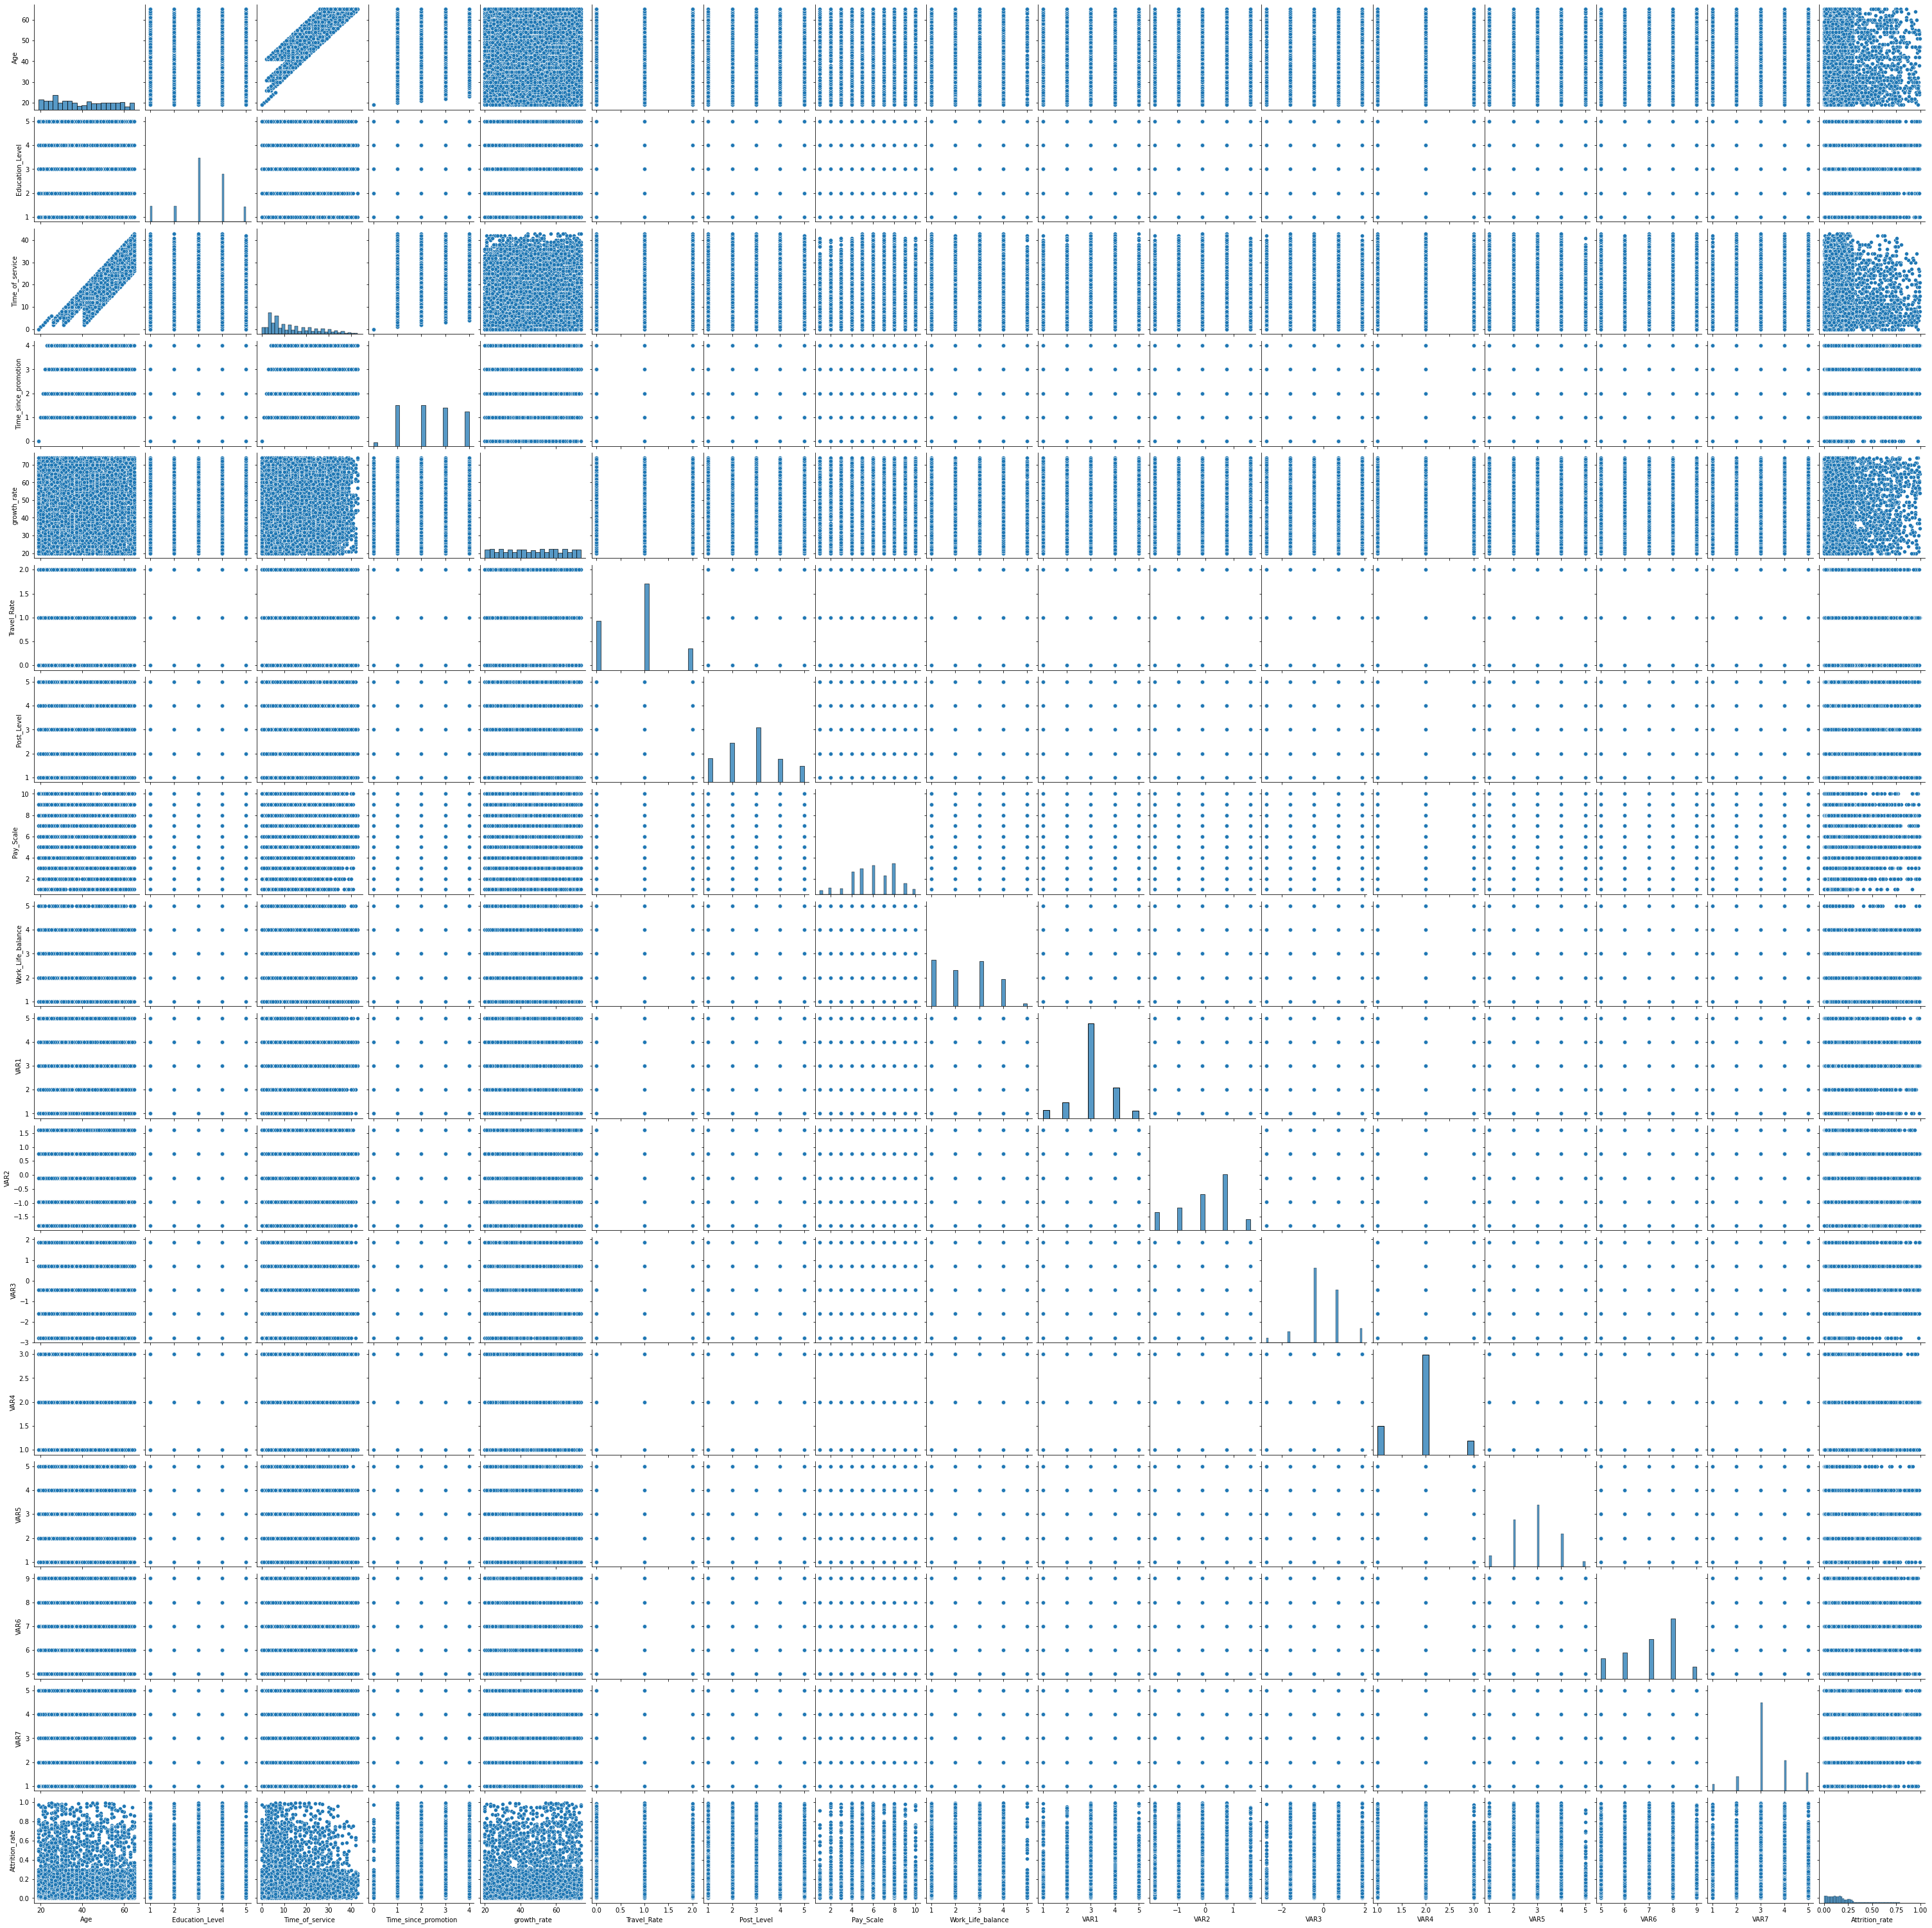

In [17]:
sns.pairplot(df)

In [18]:
#getting features with non numerical  or catagorical values
df_catagory = df.select_dtypes(exclude=np.number)
df_catagory.head()

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3


In [19]:
#check for null values in the df_catagory
df_catagory.isna().sum()

Employee_ID                  0
Gender                       0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Compensation_and_Benefits    0
dtype: int64

In [20]:
df_catagory['Employee_ID'].nunique()

10000

In [21]:
df_catagory['Employee_ID'] = df_catagory['Employee_ID'].str.replace('EID_', '').astype(int)

<ipython-input-21-d3b8ea537636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catagory['Employee_ID'] = df_catagory['Employee_ID'].str.replace('EID_', '').astype(int)


In [22]:
df_catagory['Employee_ID'].head(50)

0     23371
1     18000
2      3891
3     17492
4     22534
5      2278
6     18588
7      1235
8     10197
9     21262
10     9153
11    19087
12     4825
13    17644
14    20902
15    20121
16     5504
17     8049
18    14638
19    12947
20    20029
21    23546
22     3722
23    23853
24    16808
25     3901
26     4861
27    12981
28     7596
29    14066
30    18060
31    23729
32     5824
33     2025
34    20761
35     9775
36    22605
37    20859
38    11141
39    20542
40    17527
41    10767
42    14404
43     1433
44    15214
45     1028
46    23163
47    10796
48     2413
49    15197
Name: Employee_ID, dtype: int32

In [23]:
df_catagory['Gender'] = LabelEncoder().fit_transform(df_catagory['Gender'])
df_catagory['Relationship_Status'] = LabelEncoder().fit_transform(df_catagory['Relationship_Status'])
df_catagory['Hometown'] = LabelEncoder().fit_transform(df_catagory['Hometown'])
df_catagory['Unit'] = LabelEncoder().fit_transform(df_catagory['Unit'])
df_catagory['Decision_skill_possess'] = LabelEncoder().fit_transform(df_catagory['Decision_skill_possess'])
df_catagory['Compensation_and_Benefits'] = LabelEncoder().fit_transform(df_catagory['Compensation_and_Benefits'])

<ipython-input-23-f5eae2b941c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catagory['Gender'] = LabelEncoder().fit_transform(df_catagory['Gender'])
<ipython-input-23-f5eae2b941c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catagory['Relationship_Status'] = LabelEncoder().fit_transform(df_catagory['Relationship_Status'])
<ipython-input-23-f5eae2b941c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [24]:
df_catagory.drop(columns =['Employee_ID'], inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_catagory.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,1,2,2,2
1,1,1,3,3,0,2
2,0,0,0,8,2,2
3,0,1,2,1,1,2
4,0,0,3,3,2,3


In [26]:
df_catagory_encoded = df_catagory

In [27]:
df_catagory_encoded.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,1,2,2,2
1,1,1,3,3,0,2
2,0,0,0,8,2,2
3,0,1,2,1,1,2
4,0,0,3,3,2,3


In [28]:
df_numeric = df.select_dtypes(include=np.number).drop(columns = 'Attrition_rate')
df_numeric.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [29]:
df_numeric.isna().sum()

Age                     573
Education_Level           0
Time_of_service         196
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                12
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [30]:
df_numeric.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
Age,1.000000,-0.019583,0.917295,0.160433,-0.000487,0.010592,-0.012755,0.008032,0.000100,0.000669,0.006181,0.005103,-0.001340,-0.002263,-0.002986,0.003758
Education_Level,-0.019583,1.000000,-0.023769,-0.004403,0.004248,-0.018508,0.003910,0.001540,-0.007092,-0.000978,-0.011788,-0.012551,-0.006163,0.002439,0.002964,0.010247
Time_of_service,0.917295,-0.023769,1.000000,0.146848,-0.004935,0.009064,-0.014277,0.011298,-0.002006,-0.000426,0.006772,0.003769,-0.004993,0.004655,-0.001055,-0.000987
Time_since_promotion,0.160433,-0.004403,0.146848,1.000000,0.000572,-0.014822,-0.008798,-0.002681,-0.002505,-0.005158,0.006634,0.001299,-0.009633,-0.002644,0.001764,0.000285
growth_rate,-0.000487,0.004248,-0.004935,0.000572,1.000000,0.008024,-0.008832,0.001850,-0.014718,-0.013294,0.000886,0.007201,0.029691,-0.006268,-0.008025,-0.013571
Travel_Rate,0.010592,-0.018508,0.009064,-0.014822,0.008024,1.000000,0.011363,-0.006102,-0.001753,0.010926,0.002904,-0.008601,0.001686,-0.004150,-0.009697,0.006319
Post_Level,-0.012755,0.003910,-0.014277,-0.008798,-0.008832,0.011363,1.000000,0.024410,-0.002089,-0.006378,-0.007658,0.008104,-0.005878,0.002695,-0.000051,-0.005792
Pay_Scale,0.008032,0.001540,0.011298,-0.002681,0.001850,-0.006102,0.024410,1.000000,-0.029594,0.012256,0.008507,-0.002106,-0.001622,0.007738,-0.011612,-0.002655
Work_Life_balance,0.000100,-0.007092,-0.002006,-0.002505,-0.014718,-0.001753,-0.002089,-0.029594,1.000000,-0.014009,-0.002449,0.000670,-0.011015,0.025167,0.001128,0.025743
VAR1,0.000669,-0.000978,-0.000426,-0.005158,-0.013294,0.010926,-0.006378,0.012256,-0.014009,1.000000,-0.000057,0.002303,0.011319,-0.001639,-0.010254,0.007538


In [31]:
df_numeric['Age'] = df_numeric.groupby(['Time_since_promotion']).Age.transform(lambda x: x.fillna(x.median()))

In [32]:
df_numeric.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
Age,1.000000,-0.017847,0.893523,0.165546,-0.000132,0.010613,-0.012126,0.007970,0.000703,0.000860,0.005887,0.005150,-0.001020,-0.002844,-0.003074,0.003583
Education_Level,-0.017847,1.000000,-0.023769,-0.004403,0.004248,-0.018508,0.003910,0.001540,-0.007092,-0.000978,-0.011788,-0.012551,-0.006163,0.002439,0.002964,0.010247
Time_of_service,0.893523,-0.023769,1.000000,0.146848,-0.004935,0.009064,-0.014277,0.011298,-0.002006,-0.000426,0.006772,0.003769,-0.004993,0.004655,-0.001055,-0.000987
Time_since_promotion,0.165546,-0.004403,0.146848,1.000000,0.000572,-0.014822,-0.008798,-0.002681,-0.002505,-0.005158,0.006634,0.001299,-0.009633,-0.002644,0.001764,0.000285
growth_rate,-0.000132,0.004248,-0.004935,0.000572,1.000000,0.008024,-0.008832,0.001850,-0.014718,-0.013294,0.000886,0.007201,0.029691,-0.006268,-0.008025,-0.013571
Travel_Rate,0.010613,-0.018508,0.009064,-0.014822,0.008024,1.000000,0.011363,-0.006102,-0.001753,0.010926,0.002904,-0.008601,0.001686,-0.004150,-0.009697,0.006319
Post_Level,-0.012126,0.003910,-0.014277,-0.008798,-0.008832,0.011363,1.000000,0.024410,-0.002089,-0.006378,-0.007658,0.008104,-0.005878,0.002695,-0.000051,-0.005792
Pay_Scale,0.007970,0.001540,0.011298,-0.002681,0.001850,-0.006102,0.024410,1.000000,-0.029594,0.012256,0.008507,-0.002106,-0.001622,0.007738,-0.011612,-0.002655
Work_Life_balance,0.000703,-0.007092,-0.002006,-0.002505,-0.014718,-0.001753,-0.002089,-0.029594,1.000000,-0.014009,-0.002449,0.000670,-0.011015,0.025167,0.001128,0.025743
VAR1,0.000860,-0.000978,-0.000426,-0.005158,-0.013294,0.010926,-0.006378,0.012256,-0.014009,1.000000,-0.000057,0.002303,0.011319,-0.001639,-0.010254,0.007538


In [33]:
df_numeric['Time_of_service'] = df_numeric.groupby(['Age']).Time_of_service.transform(lambda x: x.fillna(x.median()))

In [34]:
df_numeric['Pay_Scale'] = df_numeric.groupby(['VAR1']).Pay_Scale.transform(lambda x: x.fillna(x.median()))

In [35]:
df_numeric['Work_Life_balance'] = df_numeric.groupby(['VAR7']).Work_Life_balance.transform(lambda x: x.fillna(x.median()))

In [36]:
df_numeric['VAR2'] = df_numeric.groupby(['VAR3']).VAR2.transform(lambda x: x.fillna(x.median()))

In [37]:
df_numeric['VAR4'] = df_numeric.groupby(['growth_rate']).VAR4.transform(lambda x: x.fillna(x.median()))

In [38]:
df_numeric.isna().sum()

Age                     0
Education_Level         0
Time_of_service         0
Time_since_promotion    0
growth_rate             0
Travel_Rate             0
Post_Level              0
Pay_Scale               0
Work_Life_balance       0
VAR1                    0
VAR2                    0
VAR3                    0
VAR4                    0
VAR5                    0
VAR6                    0
VAR7                    0
dtype: int64

In [39]:
df_numeric.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [40]:
preprocessed_data = pd.concat([df_numeric,df_catagory_encoded, df['Attrition_rate']] , axis = 1)

preprocessed_data.to_csv('preprocessed_HE_EA.csv', index = False)

In [41]:
preprocessed_data= pd.read_csv('preprocessed_HE_EA.csv')

In [42]:
preprocessed_data.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits,Attrition_rate
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0,0,1,2,2,2,0.1841
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,1,1,3,3,0,2,0.0670
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0,0,0,8,2,2,0.0851
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0,1,2,1,1,2,0.0668
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0,0,3,3,2,3,0.1827


In [43]:
preprocessed_data.isna().sum()

Age                             0
Education_Level                 0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Gender                          0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Compensation_and_Benefits       0
Attrition_rate               3000
dtype: int64

In [44]:
train_processed = preprocessed_data.dropna(subset=['Attrition_rate'])

In [45]:
test_processed = preprocessed_data[preprocessed_data['Attrition_rate'].isna()]

In [46]:
train_split, valid = train_test_split(train_processed, train_size = 0.8)

In [47]:
train_y =  train_split["Attrition_rate"]
train_X = train_split.loc[:, train_split.columns != 'Attrition_rate']
valid_y =  valid["Attrition_rate"]
valid_X = valid.loc[:, valid.columns != 'Attrition_rate']
test_X = test_processed.drop(columns=["Attrition_rate"])

In [48]:
def mean_absolute_percentage_error(train_y, pred_train): 
    train_y, pred_train = np.array(train_y), np.array(pred_train)
    return np.mean(np.abs((train_y - pred_train) / train_y)) * 100

In [49]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')


In [50]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "barh")
    pred_train = model.predict(train_X)
    pred_train = abs(pred_train)
    pred_valid = model.predict(valid_X)
    pred_valid = abs(pred_valid)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    RMSLE_t = np.sqrt(mean_squared_log_error(train_y,pred_train))
    train_Score = max(0,100 - RMSLE_t)
    print("Score for the train model = ", train_Score)
    
    print("Mean Absolute Error of validation data = ",mean_absolute_error(valid_y,pred_valid))
    print("RMSE of validation data = ",np.sqrt(mean_squared_error(valid_y, pred_valid)))
    print("Mean Absolute Percentage Error of validation data = ", mean_absolute_percentage_error(valid_y, pred_valid))
    RMSLE_v = np.sqrt(mean_squared_log_error(valid_y,pred_valid))
    validation_Score = max(0,100 - RMSLE_v)
    print("Score for the validation model = ", validation_Score)
    
    sample["Attrition_rate"] = pred_test
    sample.to_csv(filename, index = False)


Mean Absolute Error of train data =  0.12748310471955349
RMSE of train data =  0.185184055423156
Mean Absolute Percentage Error of train data =  inf
Score for the train model =  99.86118372313521
Mean Absolute Error of validation data =  0.12438579384495463
RMSE of validation data =  0.1856507614833384
Mean Absolute Percentage Error of validation data =  inf
Score for the validation model =  99.86177316190577


<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


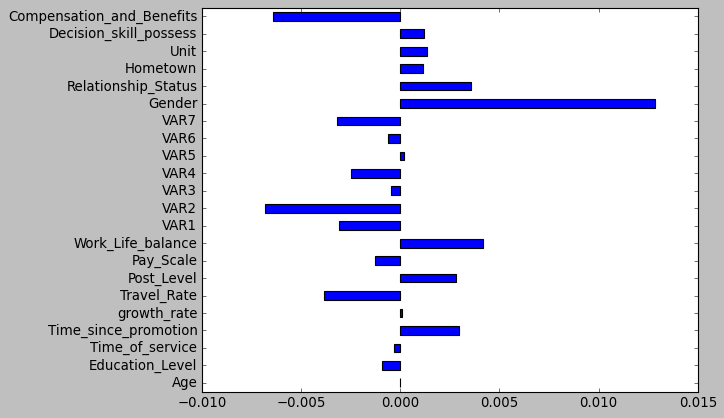

In [51]:
LR_model = LinearRegression()
run_model(LR_model, train_X, train_y, test_X, sample, "HE_EA_predresults_LR.csv" )

In [52]:
print("Training set score_LR: {:.2f}".format(LR_model.score(train_X, train_y)))
print("Validation set score_LR: {:.2f}".format(LR_model.score(valid_X, valid_y)))
print("Number of features used_LR: {}".format(np.sum(LR_model.coef_ != 0)))

Training set score_LR: 0.01
Validation set score_LR: -0.00
Number of features used_LR: 22


Mean Absolute Error of train data =  0.12748306000554963
RMSE of train data =  0.18518405543016048
Mean Absolute Percentage Error of train data =  inf
Score for the train model =  99.86118373561577
Mean Absolute Error of validation data =  0.12438561999342121
RMSE of validation data =  0.18565069692376293
Mean Absolute Percentage Error of validation data =  inf
Score for the validation model =  99.86177322975864


<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


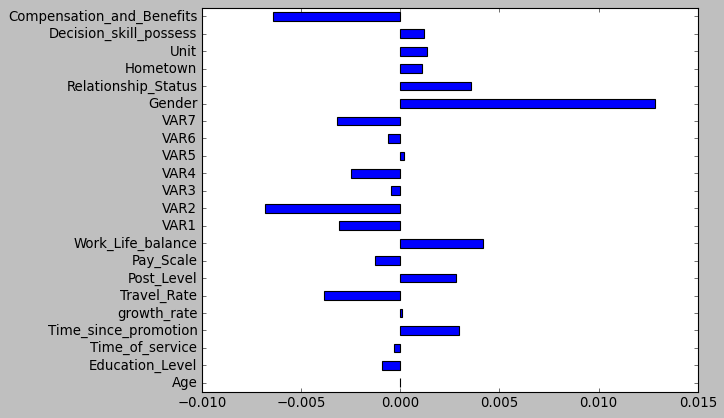

In [53]:
Ridge_model = Ridge(alpha=0.0001,normalize=True)
run_model(Ridge_model, train_X, train_y, test_X, sample, "HE_EA_predresults_ridge.csv" )

In [54]:
print("Training set score_Ridge: {:.2f}".format(Ridge_model.score(train_X, train_y)))
print("Validation set score_Ridge: {:.2f}".format(Ridge_model.score(valid_X, valid_y)))
print("Number of features used_Ridge: {}".format(np.sum(Ridge_model.coef_ != 0)))

Training set score_Ridge: 0.01
Validation set score_Ridge: -0.00
Number of features used_Ridge: 22


Mean Absolute Error of train data =  0.1275503580229592
RMSE of train data =  0.18577504142683576
Mean Absolute Percentage Error of train data =  inf
Score for the train model =  99.86075998629858
Mean Absolute Error of validation data =  0.12352658604591836
RMSE of validation data =  0.1856015783339445
Mean Absolute Percentage Error of validation data =  inf
Score for the validation model =  99.86188724095611


<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


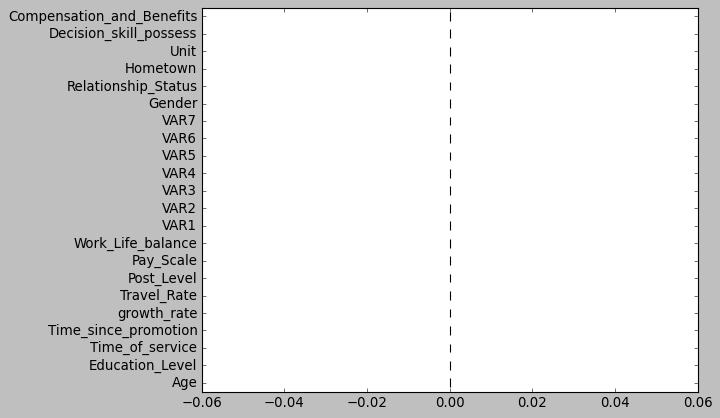

In [55]:
Lasso_model = Lasso(alpha=0.01,normalize=True)
run_model(Lasso_model, train_X, train_y, test_X, sample, "HE_EA_predresults_lasso.csv" )

In [56]:
print("Training set score_Lasso: {:.2f}".format(Lasso_model.score(train_X, train_y)))
print("Validation set score_Lasso: {:.2f}".format(Lasso_model.score(valid_X, valid_y)))
print("Number of features used_Lasso: {}".format(np.sum(Lasso_model.coef_ != 0)))

Training set score_Lasso: 0.00
Validation set score_Lasso: -0.00
Number of features used_Lasso: 0


Mean Absolute Error of train data =  0.1275503580229592
RMSE of train data =  0.18577504142683576
Mean Absolute Percentage Error of train data =  inf
Score for the train model =  99.86075998629858
Mean Absolute Error of validation data =  0.12352658604591836
RMSE of validation data =  0.1856015783339445
Mean Absolute Percentage Error of validation data =  inf
Score for the validation model =  99.86188724095611


<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


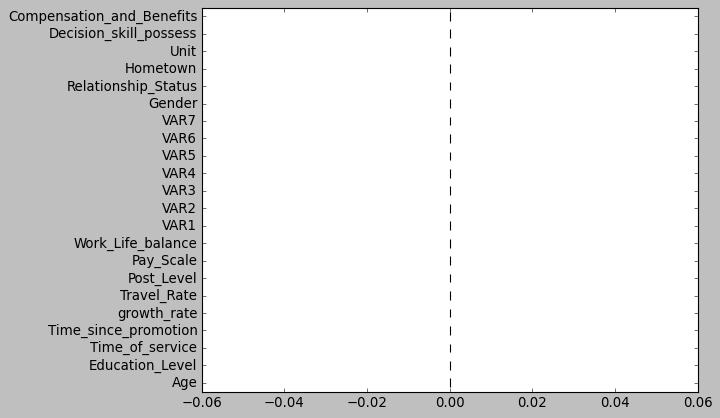

In [57]:
ElasticNet_model = ElasticNet(alpha=1,l1_ratio=0.1, max_iter=1000000)
run_model(ElasticNet_model, train_X, train_y, test_X, sample, "HE_EA_predresults_elasticnet.csv" )

In [58]:
print("Training set score_elasticnet: {:.2f}".format(ElasticNet_model.score(train_X, train_y)))
print("Validation set score_Lasso: {:.2f}".format(ElasticNet_model.score(valid_X, valid_y)))
print("Number of features used_elasticnet: {}".format(np.sum(ElasticNet_model.coef_ != 0)))

Training set score_elasticnet: 0.00
Validation set score_Lasso: -0.00
Number of features used_elasticnet: 0


In [59]:
def run_model1(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_train = abs(pred_train)
    pred_valid = model.predict(valid_X)
    pred_valid = abs(pred_valid)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    
    print("\nMean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("\nRMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    print("\nMean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    RMSLE_t = np.sqrt(mean_squared_log_error(train_y,pred_train))
    train_Score = max(0,100 - RMSLE_t)
    print("\nScore for the train model = ", train_Score)
    
    train_importances = list(zip(train_X.loc[:, train_X.columns != 'Attrition_rate'].columns,model.feature_importances_))
    print("\ntrain_importances:",*train_importances, sep='\n')
    
    print("\nMean Absolute Error of validation data = ",mean_absolute_error(valid_y,pred_valid))
    print("\nRMSE of validation data = ",np.sqrt(mean_squared_error(valid_y, pred_valid)))
    print("\nMean Absolute Percentage Error of validation data = ", mean_absolute_percentage_error(valid_y, pred_valid))
    RMSLE_v = np.sqrt(mean_squared_log_error(valid_y,pred_valid))
    validation_Score = max(0,100 - RMSLE_v)
    print("\nScore for the validation model = ", validation_Score)
    
    validation_importances = list(zip(valid_X.loc[:, valid_X.columns != 'Attrition_rate'].columns,model.feature_importances_))
    print("\nvalidation_importances:",*validation_importances, sep='\n')
    
    sample["Attrition_rate"] = pred_test
    sample.to_csv(filename, index = False)


In [60]:
DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth = 15, random_state=42)
run_model1(DecisionTreeRegressor_model, train_X, train_y, test_X, sample, "HE_EA__predresults_DecisionTreeRegression.csv" )


Mean Absolute Error of train data =  0.04106287161618675

RMSE of train data =  0.07868077349676442

Mean Absolute Percentage Error of train data =  nan

Score for the train model =  99.9384079340411

train_importances:
('Age', 0.07410507014989695)
('Education_Level', 0.047747518112441954)
('Time_of_service', 0.07544974721894772)
('Time_since_promotion', 0.03704805774236241)
('growth_rate', 0.12575147197966718)
('Travel_Rate', 0.035491353769679365)
('Post_Level', 0.044702930041711726)
('Pay_Scale', 0.08319100240569668)
('Work_Life_balance', 0.0355997298872387)
('VAR1', 0.03922844890341483)
('VAR2', 0.017024944148122105)
('VAR3', 0.041332638973377266)
('VAR4', 0.022066538767396414)
('VAR5', 0.0548826641174767)
('VAR6', 0.027637133779191796)
('VAR7', 0.035616758898693104)
('Gender', 0.016360921371845333)
('Relationship_Status', 0.01538099686973365)
('Hometown', 0.04201574775976121)
('Unit', 0.05117674535900923)
('Decision_skill_possess', 0.0347831978006291)
('Compensation_and_Benefits',

<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


In [61]:
print("Training set score DecisionTreeRegressor: {:.2f}".format(DecisionTreeRegressor_model.score(train_X, train_y)))
print("Validation set score DecisionTreeRegressor: {:.2f}".format(DecisionTreeRegressor_model.score(valid_X, valid_y)))
print("Number of features used DecisionTreeRegressor: {}".format(np.sum(DecisionTreeRegressor_model.feature_importances_ != 0)))

Training set score DecisionTreeRegressor: 0.82
Validation set score DecisionTreeRegressor: -1.04
Number of features used DecisionTreeRegressor: 22


In [62]:
RandomForestRegressor_model = RandomForestRegressor(max_depth = 12,n_estimators=100, n_jobs=-1, random_state=42)
run_model1(RandomForestRegressor_model,train_X, train_y, test_X, sample, "HE_EA_predresults_RandomForestRegression.csv" )


Mean Absolute Error of train data =  0.08870861688909486

RMSE of train data =  0.12295318325306295

Mean Absolute Percentage Error of train data =  inf

Score for the train model =  99.90838304915509

train_importances:
('Age', 0.08248675321974425)
('Education_Level', 0.04309712807033171)
('Time_of_service', 0.07914211061586168)
('Time_since_promotion', 0.03507517191066059)
('growth_rate', 0.12077167877092358)
('Travel_Rate', 0.025644053976478055)
('Post_Level', 0.042073608207651735)
('Pay_Scale', 0.06413791252325243)
('Work_Life_balance', 0.042837927561526525)
('VAR1', 0.039959901598639845)
('VAR2', 0.034451796246713316)
('VAR3', 0.04049970229486487)
('VAR4', 0.022189458945555435)
('VAR5', 0.03804355373049354)
('VAR6', 0.04368987037840659)
('VAR7', 0.03878120963072727)
('Gender', 0.012837866801088556)
('Relationship_Status', 0.015039457489377786)
('Hometown', 0.04189286110096385)
('Unit', 0.06379993108642475)
('Decision_skill_possess', 0.03550878455606868)
('Compensation_and_Benefit

<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


In [63]:
print("Training set score RandomForestRegressor: {:.2f}".format(RandomForestRegressor_model.score(train_X, train_y)))
print("Validation set score RandomForestRegressor: {:.2f}".format(RandomForestRegressor_model.score(valid_X, valid_y)))
print("Number of features used RandomForestRegressor: {}".format(np.sum(RandomForestRegressor_model.feature_importances_ != 0)))

Training set score RandomForestRegressor: 0.56
Validation set score RandomForestRegressor: -0.01
Number of features used RandomForestRegressor: 22


In [64]:
GradientBoostingRegressor_model = GradientBoostingRegressor(max_depth = 8, random_state=42)
run_model1(GradientBoostingRegressor_model, train_X, train_y, test_X, sample, "HE_EA_predresults_GradientBoostingRegression.csv" )


Mean Absolute Error of train data =  0.046257933404877084

RMSE of train data =  0.06530394470864663

Mean Absolute Percentage Error of train data =  inf

Score for the train model =  99.95009792466789

train_importances:
('Age', 0.08737532525769938)
('Education_Level', 0.04689339341085955)
('Time_of_service', 0.08088013283068483)
('Time_since_promotion', 0.037485168934677536)
('growth_rate', 0.12387308763221568)
('Travel_Rate', 0.028250740820770778)
('Post_Level', 0.047804469076490344)
('Pay_Scale', 0.07075322634270888)
('Work_Life_balance', 0.040630975193868636)
('VAR1', 0.03773935492005821)
('VAR2', 0.033214803364848035)
('VAR3', 0.03190443892674448)
('VAR4', 0.021286039999509482)
('VAR5', 0.03633585498828828)
('VAR6', 0.03709673715260393)
('VAR7', 0.03822508894020747)
('Gender', 0.011789032312686819)
('Relationship_Status', 0.01356250088493631)
('Hometown', 0.04572470178182152)
('Unit', 0.061467312282587686)
('Decision_skill_possess', 0.030167484718213174)
('Compensation_and_Benef

<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100
<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100


In [65]:
print("Training set score GradientBoostingRegressor: {:.2f}".format(GradientBoostingRegressor_model.score(train_X, train_y)))
print("Validation set score GradientBoostingRegressor: {:.2f}".format(GradientBoostingRegressor_model.score(valid_X, valid_y)))
print("Number of features used GradientBoostingRegressor: {}".format(np.sum(GradientBoostingRegressor_model.feature_importances_ != 0)))

Training set score GradientBoostingRegressor: 0.88
Validation set score GradientBoostingRegressor: -0.12
Number of features used GradientBoostingRegressor: 22


In [66]:
XGBRegressor_model = XGBRegressor(max_depth = 25, random_state=42)
run_model1(XGBRegressor_model, train_X, train_y, test_X, sample, "HE_EA_predresult_XGBRegression.csv" )


Mean Absolute Error of train data =  0.00039677399769748426

RMSE of train data =  0.0006438891342517796

Mean Absolute Percentage Error of train data =  inf

Score for the train model =  99.99949550641605


<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100



train_importances:
('Age', 0.034187462)
('Education_Level', 0.04073996)
('Time_of_service', 0.04179378)
('Time_since_promotion', 0.03883497)
('growth_rate', 0.046926055)
('Travel_Rate', 0.047377963)
('Post_Level', 0.045040943)
('Pay_Scale', 0.049682613)
('Work_Life_balance', 0.050640404)
('VAR1', 0.056800663)
('VAR2', 0.039725985)
('VAR3', 0.04879714)
('VAR4', 0.04423698)
('VAR5', 0.042326413)
('VAR6', 0.054341387)
('VAR7', 0.053615846)
('Gender', 0.033102896)
('Relationship_Status', 0.035241794)
('Hometown', 0.048356697)
('Unit', 0.04813212)
('Decision_skill_possess', 0.042840492)
('Compensation_and_Benefits', 0.057257418)

Mean Absolute Error of validation data =  0.143173897073618

RMSE of validation data =  0.20206824739998416

Mean Absolute Percentage Error of validation data =  inf

Score for the validation model =  99.84717483398167


<ipython-input-48-26af3b5c45c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((train_y - pred_train) / train_y)) * 100



validation_importances:
('Age', 0.034187462)
('Education_Level', 0.04073996)
('Time_of_service', 0.04179378)
('Time_since_promotion', 0.03883497)
('growth_rate', 0.046926055)
('Travel_Rate', 0.047377963)
('Post_Level', 0.045040943)
('Pay_Scale', 0.049682613)
('Work_Life_balance', 0.050640404)
('VAR1', 0.056800663)
('VAR2', 0.039725985)
('VAR3', 0.04879714)
('VAR4', 0.04423698)
('VAR5', 0.042326413)
('VAR6', 0.054341387)
('VAR7', 0.053615846)
('Gender', 0.033102896)
('Relationship_Status', 0.035241794)
('Hometown', 0.048356697)
('Unit', 0.04813212)
('Decision_skill_possess', 0.042840492)
('Compensation_and_Benefits', 0.057257418)


In [67]:
print("Training set score XGBRegressor: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Validation set score XGBRegressor: {:.2f}".format(XGBRegressor_model.score(valid_X, valid_y)))
print("Number of features used XGBRegressor: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor: 1.00
Validation set score XGBRegressor: -0.19
Number of features used XGBRegressor: 22
